# Convolutional Neural Network

### Importing the libraries

In [35]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing.image import smart_resize
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPool2D
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import load_img
from tensorflow.keras.utils import img_to_array

## Part 1 - Data Preprocessing

### Preprocessing the Training set

In [2]:
train_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True)

training_set = train_datagen.flow_from_directory(
        'dataset/training_set',
        target_size=(64, 64),
        batch_size=32,
        class_mode='binary')

Found 8000 images belonging to 2 classes.


### Preprocessing the Test set

In [3]:
test_datagen = ImageDataGenerator(rescale=1./255)
test_set = test_datagen.flow_from_directory(
        'dataset/test_set',
        target_size=(64, 64),
        batch_size=32,
        class_mode='binary')

Found 2000 images belonging to 2 classes.


## Part 2 - Building the CNN

### Initialising the CNN

In [4]:
cnn = Sequential()

### Step 1 - Convolution

In [5]:
cnn.add(Conv2D(filters=32, kernel_size=3, activation='relu', input_shape=(64, 64, 3)))

### Step 2 - Pooling

In [6]:
cnn.add(MaxPool2D(pool_size=2, strides=2))

### Adding a second convolutional layer

In [7]:
cnn.add(Conv2D(filters=32, kernel_size=3, activation='relu'))
cnn.add(MaxPool2D(pool_size=2, strides=2))

### Step 3 - Flattening

In [8]:
cnn.add(Flatten())

### Step 4 - Full Connection

In [9]:
cnn.add(Dense(units=128, activation='relu'))

### Step 5 - Output Layer

In [10]:
cnn.add(Dense(units=1, activation='sigmoid'))

## Part 3 - Training the CNN

### Compiling the CNN

In [11]:
cnn.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

### Training the CNN on the Training set and evaluating it on the Test set

In [12]:
cnn.fit(x=training_set, validation_data=test_set, epochs=25)

Epoch 1/25
250/250 [==============================] - 118s 467ms/step - loss: 0.6770 - accuracy: 0.5646 - val_loss: 0.6996 - val_accuracy: 0.5630
Epoch 2/25
250/250 [==============================] - 58s 232ms/step - loss: 0.6083 - accuracy: 0.6676 - val_loss: 0.5682 - val_accuracy: 0.7160
Epoch 3/25
250/250 [==============================] - 56s 223ms/step - loss: 0.5636 - accuracy: 0.7061 - val_loss: 0.5995 - val_accuracy: 0.6925
Epoch 4/25
250/250 [==============================] - 56s 226ms/step - loss: 0.5421 - accuracy: 0.7245 - val_loss: 0.5263 - val_accuracy: 0.7420
Epoch 5/25
250/250 [==============================] - 56s 222ms/step - loss: 0.5105 - accuracy: 0.7483 - val_loss: 0.6331 - val_accuracy: 0.7045
Epoch 6/25
250/250 [==============================] - 56s 223ms/step - loss: 0.4839 - accuracy: 0.7654 - val_loss: 0.5113 - val_accuracy: 0.7510
Epoch 7/25
250/250 [==============================] - 58s 230ms/step - loss: 0.4805 - accuracy: 0.7714 - val_loss: 0.4994 - val_a

## Part 4 - Making prediction

In [57]:
img1 = load_img('dataset/single_prediction/cat_or_dog_1.jpg')
test_img1 = load_img('dataset/single_prediction/cat_or_dog_1.jpg', target_size=(64, 64))
test_img1 = img_to_array(test_img1)
test_img1 = np.expand_dims(test_img1, axis=0)
result1 = cnn.predict(test_img1/255.0)

img2 = load_img('dataset/single_prediction/cat_or_dog_2.jpg')
test_img2 = load_img('dataset/single_prediction/cat_or_dog_2.jpg', target_size=(64, 64))
test_img2 = img_to_array(test_img2)
test_img2 = np.expand_dims(test_img2, axis=0)
result2 = cnn.predict(test_img2/255)

pred1 = ''
if result1[0][0] >= 0.5:
  pred1 = 'Dog'
else:
  pred1 = 'Cat'


pred2 = ''
if result2[0][0] >= 0.5:
  pred2 = 'Dog'
else:
  pred2 = 'Cat'

1/1 [==============================] - 0s 31ms/step


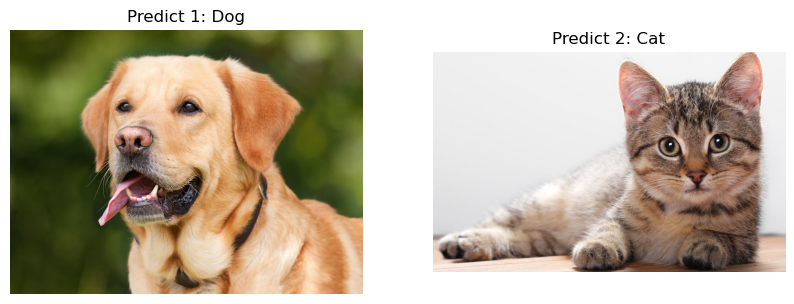

In [58]:
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(img1)
plt.axis('off')
plt.title(f'Predict 1: {pred1}')

plt.subplot(1, 2, 2)
plt.imshow(img2)
plt.axis('off')
plt.title(f'Predict 2: {pred2}')

plt.show()